In [6]:
#import libraries
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler


#load and generate descriptive statistics for primary dataframe
data = pd.read_csv('imdb_top_1000.csv')
data.describe(include='all')

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000,1000,899,1000,1000,1000.000000,1000,843.000000,1000,1000,1000,1000,1000,1.000000e+03,831
unique,1000,999,100,16,140,202,NaN,1000,NaN,548,660,841,891,939,NaN,823
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,NaN,Two imprisoned men bond over a number of years...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,1,2,32,234,23,85,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.949300,NaN,77.971530,NaN,NaN,NaN,NaN,NaN,2.736929e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.275491,NaN,12.376099,NaN,NaN,NaN,NaN,NaN,3.273727e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,NaN


In [7]:
# Gather info regarding dtypes of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [8]:
# We begin preprocessing the Released Year column

# Check for missing or invalid values in the "Released Year" feature

#---------------------RESOLVED ISSUE---------------------
# Unique values generated below for year column are strings rather than ints
# We want to change that into an int

print(data['Released_Year'].isna().sum()) # number of missing values = 0
print(data['Released_Year'].unique()) # unique values in the column are strings entries with 1 'PG' entry

0
['1994' '1972' '2008' '1974' '1957' '2003' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2020' '2019' '2014' '1998' '1997'
 '1995' '1991' '1977' '1962' '1954' '1946' '2011' '2006' '2000' '1988'
 '1985' '1968' '1960' '1942' '1936' '1931' '2018' '2017' '2016' '2012'
 '2009' '2007' '1984' '1981' '1979' '1971' '1963' '1964' '1950' '1940'
 '2013' '2005' '2004' '1992' '1987' '1986' '1983' '1976' '1973' '1965'
 '1959' '1958' '1952' '1948' '1944' '1941' '1927' '1921' '2015' '1996'
 '1989' '1978' '1961' '1955' '1953' '1925' '1924' '1982' '1967' '1951'
 '1949' '1939' '1937' '1934' '1928' '1926' '1920' '1970' '1969' '1956'
 '1947' '1945' '1930' '1938' '1935' '1933' '1932' '1922' '1943' 'PG']


In [9]:
# If a value is numeric keep as is, if not then use lambda function to make the entry NaN

# Lambda isnumeric() benefit: Will not effect string years because they can be converted to a numeric value
data['Released_Year'] = data['Released_Year'].apply(lambda x: x if x.isnumeric() else None)

# update the dataframe to the new column excluding the non-numeric data
data['Released_Year'] = pd.to_numeric(data['Released_Year'])

In [10]:
# Generate the NaN values and unique values again
print(data['Released_Year'].isna().sum()) # number of missing (NaN) values = 1
print(data['Released_Year'].unique()) # unique values in the column are now float entries (e.g. 1994.)

1
[1994. 1972. 2008. 1974. 1957. 2003. 1993. 2010. 1999. 2001. 1966. 2002.
 1990. 1980. 1975. 2020. 2019. 2014. 1998. 1997. 1995. 1991. 1977. 1962.
 1954. 1946. 2011. 2006. 2000. 1988. 1985. 1968. 1960. 1942. 1936. 1931.
 2018. 2017. 2016. 2012. 2009. 2007. 1984. 1981. 1979. 1971. 1963. 1964.
 1950. 1940. 2013. 2005. 2004. 1992. 1987. 1986. 1983. 1976. 1973. 1965.
 1959. 1958. 1952. 1948. 1944. 1941. 1927. 1921. 2015. 1996. 1989. 1978.
 1961. 1955. 1953. 1925. 1924. 1982. 1967. 1951. 1949. 1939. 1937. 1934.
 1928. 1926. 1920. 1970. 1969. 1956. 1947. 1945. 1930. 1938. 1935. 1933.
 1932. 1922. 1943.   nan]


In [11]:
#Check the dtype for released year
data.info() #dtype for released year is now float for some reason

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  999 non-null    float64
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(3), int64(1), object(12)
memory usage: 125.1+ KB


In [12]:
# Take in account the new NaN value for the incorrect "PG" entry

# Fill in the NaN value with the mean for the column as the correct imputation for numerical data
data['Released_Year'] = data['Released_Year'].fillna(data["Released_Year"].mean()).astype(int)

# Update the new released year column with the imputation accounted for
data['Released_Year'] = data['Released_Year'].astype(int)

# Print the new unique values
print(data['Released_Year'].unique()) # No more strings,floats, or NaN values - all are integers

[1994 1972 2008 1974 1957 2003 1993 2010 1999 2001 1966 2002 1990 1980
 1975 2020 2019 2014 1998 1997 1995 1991 1977 1962 1954 1946 2011 2006
 2000 1988 1985 1968 1960 1942 1936 1931 2018 2017 2016 2012 2009 2007
 1984 1981 1979 1971 1963 1964 1950 1940 2013 2005 2004 1992 1987 1986
 1983 1976 1973 1965 1959 1958 1952 1948 1944 1941 1927 1921 2015 1996
 1989 1978 1961 1955 1953 1925 1924 1982 1967 1951 1949 1939 1937 1934
 1928 1926 1920 1970 1969 1956 1947 1945 1930 1938 1935 1933 1932 1922
 1943]


In [13]:
#Now load new dataframe with 5000 IMDB entries and generate descriptive statistics
data2 = pd.read_csv('imdb_top_5000.csv')
data2.describe(include='all')


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


In [14]:
#Now the Released Year has been converted into an integer and the imputation for 'PG' is complete
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   int64  
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.1+ KB


In [15]:
#initially contains 5043 data entries 
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [16]:
# What to keep for IMDB 1000 Features and what to drop
#--------------------------------------------------------
#1. Drop Poster_Link - dont need this feature
#2. Merge Series_Title = movie_title
#3. Released_Year = title_year
#4. Certificate = content_rating
#5. Genre = genres
#6. IMDB_Rating = imdb_score
#7. Runtime = duration
#8. Drop Overview - the plot keywords likely has this info for the 1000 and if not we can impute it
#9. Drop metascore - useless feature (weighted average reviews from top critics)
#10. Director = director_name
#11. Star1 = actor_1_name
#12. Star2 = actor_2_name
#13. Star3 = actor_3_name
#14. Drop Star4 - we will be missing 4000 entries for a 4th actor
#15. Drop No_of_Votes - since it doesnt specify critics or users which 5000 dataframe does
#16. Gross = gross

# Tasks after loading both datasets
#--------------------------------------------------------
#1. Normalize the movie titles in both dataframes to get rid of inconsistencies so it matches
#2. Drop the 1000 IMDB features that we don't need (listed above)
#3. Rename the features in 5000 IMDB dataframe to match the first
#4. Concatenate the two dataframes 
#5. Drop duplicate entries using the drop method
#6. Save the merged dataframe to a new csv

In [17]:
#1. Normalize the movie titles in both dataframes to get rid of inconsistencies so it matches
data['movie_title'] = data['Series_Title'].str.lower().str.strip()
data2['movie_title'] = data2['movie_title'].str.lower().str.strip()


# disregard KeyError, I accidently tried to run this old code and neglected to realize 
# 'Series_Title' has been renamed in line 2

In [18]:
#2. Drop the 1000 IMDB features that we don't need (listed above)
# Poster_Link, Overview, Meta_score, Star4, No_of_Votes, 

data = data.drop(['Poster_Link', 'Overview', 'Meta_score', 'Star4', 'No_of_Votes'], axis=1)

In [19]:
#3. Rename the features in 5000 IMDB dataframe to match the first
# Series_Title = movie_title, Released_Year = title_year, Certificate = content_rating, Genre = genres
# IMDB_Rating = imdb_score, Runtime = duration, Director = director_name, Star1 = actor_1_name
# Star2 = actor_2_name, Star3 = actor_3_name, Gross = gross

data = data.rename(columns={
    # Renamed features
    'Series_Title': 'movie_title',
    'Released_Year': 'title_year',
    'Certificate': 'content_rating',
    'Genre': 'genres',
    'IMDB_Rating': 'imdb_score',
    'Runtime': 'duration',
    'Director': 'director_name',
    'Star1': 'actor_1_name',
    'Star2': 'actor_2_name',
    'Star3': 'actor_3_name',
    'Gross': 'gross'
})


In [20]:
# Prior to merging both dataframes I got the error that there were duplicate movie entries in each dataframe
# ERROR "The column label 'movie_title' is not unique."

#Now individually droping duplicates has worked and prepared the environment for a merge

data = data.drop_duplicates(subset=['movie_title'])
data2 = data2.drop_duplicates(subset=['movie_title'])

# Aftering generating info on both dataframes, I see that only 1 duplicate entry existed for 1st dataframe
# Dataframe 2, however, has gone from a range of 5043 entries to 4916 --> this had the most duplicate entries

In [21]:
# I accidently duplicated movie_title in 'data' dataframe
# So I located duplicate columns in data and deleted it

data = data.loc[:, ~data.columns.duplicated()]



In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_title     999 non-null    object 
 1   title_year      999 non-null    int64  
 2   content_rating  898 non-null    object 
 3   duration        999 non-null    object 
 4   genres          999 non-null    object 
 5   imdb_score      999 non-null    float64
 6   director_name   999 non-null    object 
 7   actor_1_name    999 non-null    object 
 8   actor_2_name    999 non-null    object 
 9   actor_3_name    999 non-null    object 
 10  gross           830 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 93.7+ KB


In [23]:
# delete 'mins'
data['duration'] = data['duration'].str.replace('min', '')
data['duration'] = data['duration'].astype('Int64')

In [24]:
# delete commas in the gross feature
data['gross'] = data['gross'].str.replace(',', '')
data['gross'] = data['gross'].astype('Int64')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_title     999 non-null    object 
 1   title_year      999 non-null    int64  
 2   content_rating  898 non-null    object 
 3   duration        999 non-null    Int64  
 4   genres          999 non-null    object 
 5   imdb_score      999 non-null    float64
 6   director_name   999 non-null    object 
 7   actor_1_name    999 non-null    object 
 8   actor_2_name    999 non-null    object 
 9   actor_3_name    999 non-null    object 
 10  gross           830 non-null    Int64  
dtypes: Int64(2), float64(1), int64(1), object(7)
memory usage: 95.6+ KB


In [26]:
# Here we can perform imputation on missing values prior to merging

In [27]:
# imputation for content_rating using mode
data['content_rating'].fillna(value=data['content_rating'].mode()[0], inplace=True)

In [28]:
# The skew method shows that it has an extreme positive skew over 3 so we will use median rather than mean
data['gross'].skew()

median_gross = int(data['gross'].median())
data['gross'].fillna(median_gross, inplace=True)


In [29]:
# all values have been imputed in dataframe 1
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_title     999 non-null    object 
 1   title_year      999 non-null    int64  
 2   content_rating  999 non-null    object 
 3   duration        999 non-null    Int64  
 4   genres          999 non-null    object 
 5   imdb_score      999 non-null    float64
 6   director_name   999 non-null    object 
 7   actor_1_name    999 non-null    object 
 8   actor_2_name    999 non-null    object 
 9   actor_3_name    999 non-null    object 
 10  gross           999 non-null    Int64  
dtypes: Int64(2), float64(1), int64(1), object(7)
memory usage: 95.6+ KB


In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4916 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4897 non-null   object 
 1   director_name              4814 non-null   object 
 2   num_critic_for_reviews     4867 non-null   float64
 3   duration                   4901 non-null   float64
 4   director_facebook_likes    4814 non-null   float64
 5   actor_3_facebook_likes     4893 non-null   float64
 6   actor_2_name               4903 non-null   object 
 7   actor_1_facebook_likes     4909 non-null   float64
 8   gross                      4054 non-null   float64
 9   genres                     4916 non-null   object 
 10  actor_1_name               4909 non-null   object 
 11  movie_title                4916 non-null   object 
 12  num_voted_users            4916 non-null   int64  
 13  cast_total_facebook_likes  4916 non-null   int64

In [31]:
data2.drop(['director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes',
                'cast_total_facebook_likes', 'facenumber_in_poster', 'plot_keywords', 
                'movie_imdb_link', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes'],
               axis=1, inplace=True)




In [32]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4916 entries, 0 to 5042
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   4897 non-null   object 
 1   director_name           4814 non-null   object 
 2   num_critic_for_reviews  4867 non-null   float64
 3   duration                4901 non-null   float64
 4   actor_2_name            4903 non-null   object 
 5   gross                   4054 non-null   float64
 6   genres                  4916 non-null   object 
 7   actor_1_name            4909 non-null   object 
 8   movie_title             4916 non-null   object 
 9   num_voted_users         4916 non-null   int64  
 10  actor_3_name            4893 non-null   object 
 11  num_user_for_reviews    4895 non-null   float64
 12  language                4904 non-null   object 
 13  country                 4911 non-null   object 
 14  content_rating          4616 non-null   

In [33]:
data2['num_critic_for_reviews'] = data2['num_critic_for_reviews'].astype('Int64')
data2['num_voted_users'] = data2['num_voted_users'].astype('Int64')
data2['num_user_for_reviews'] = data2['num_user_for_reviews'].astype('Int64')
data2['budget'] = data2['budget'].astype('Int64')


In [34]:
data2['title_year'] = data2['title_year'].astype('Int64')

In [35]:
data2['duration'] = data2['duration'].astype('Int64')

In [36]:
data2['gross'] = data2['gross'].astype('Int64')

In [37]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4916 entries, 0 to 5042
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   4897 non-null   object 
 1   director_name           4814 non-null   object 
 2   num_critic_for_reviews  4867 non-null   Int64  
 3   duration                4901 non-null   Int64  
 4   actor_2_name            4903 non-null   object 
 5   gross                   4054 non-null   Int64  
 6   genres                  4916 non-null   object 
 7   actor_1_name            4909 non-null   object 
 8   movie_title             4916 non-null   object 
 9   num_voted_users         4916 non-null   Int64  
 10  actor_3_name            4893 non-null   object 
 11  num_user_for_reviews    4895 non-null   Int64  
 12  language                4904 non-null   object 
 13  country                 4911 non-null   object 
 14  content_rating          4616 non-null   

In [38]:
# Now we impute all values for dataframe 2

In [39]:
# Impute missing values in color column with mode
data2['color'].fillna(value=data2['color'].mode()[0], inplace=True)


In [40]:
# Impute 100 missing values in director name column with mode
data2['director_name'].fillna(value=data2['director_name'].mode()[0], inplace=True)

In [41]:
# The skew method shows that it has an extreme positive skew of 1.5 so we will use median rather than mean
# imputing for 15 missing values
data2['duration'].skew()

median_duration= int(data2['duration'].median())
data2['duration'].fillna(median_duration, inplace=True)

In [42]:
# imputation for actor_2_name using mode
data2['actor_2_name'].fillna(value=data2['actor_2_name'].mode()[0], inplace=True)

In [43]:
# The skew method shows that it has an extreme positive skew of over 3 so we will use median rather than mean
# imputing for 862 missing values

data2['gross'].skew()

median_gross = int(data2['gross'].median())
data2['gross'].fillna(median_gross, inplace=True)

In [44]:
# The skew method shows that it has an extreme positive skew of 2 so we will use median rather than mean
# imputing for 49 missing values
data2['num_critic_for_reviews'].skew()

median_num_critic = int(data2['num_critic_for_reviews'].median())
data2['num_critic_for_reviews'].fillna(median_num_critic, inplace=True)

In [45]:
# imputation for actor_1_name using mode
# 13 missing values
data2['actor_1_name'].fillna(value=data2['actor_1_name'].mode()[0], inplace=True)

In [46]:
# imputation for actor_3_name using mode
# 7 missing values
data2['actor_3_name'].fillna(value=data2['actor_3_name'].mode()[0], inplace=True)

In [47]:
# The skew method shows that it has an extreme positive skew of over 4 so we will use median rather than mean
# imputing for 21 missing values
data2['num_user_for_reviews'].skew()

median_num_user = int(data2['num_user_for_reviews'].median())
data2['num_user_for_reviews'].fillna(median_num_user, inplace=True)

In [48]:
# impute language using mode
# 12 missing values
data2['language'].fillna(value=data2['language'].mode()[0], inplace=True)

In [49]:
# impute country using mode
# 5 missing values
data2['country'].fillna(value=data2['country'].mode()[0], inplace=True)

In [50]:
# impute content rating using mode
# 300 missing values
data2['content_rating'].fillna(value=data2['content_rating'].mode()[0], inplace=True)

In [51]:
# The skew method shows that it has an extreme positive skew of over 25 so we will use median rather than mean
# imputing for 484 missing values
data2['budget'].skew()

median_budget = int(data2['budget'].median())
data2['budget'].fillna(median_budget, inplace=True)

In [52]:
# The skew method shows that it has an extreme negative skew of -2 so we will use median rather than mean
# imputing for 106 missing values
data2['title_year'].skew()

median_year = int(data2['title_year'].median())
data2['title_year'].fillna(median_year, inplace=True)

In [53]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4916 entries, 0 to 5042
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   4916 non-null   object 
 1   director_name           4916 non-null   object 
 2   num_critic_for_reviews  4916 non-null   Int64  
 3   duration                4916 non-null   Int64  
 4   actor_2_name            4916 non-null   object 
 5   gross                   4916 non-null   Int64  
 6   genres                  4916 non-null   object 
 7   actor_1_name            4916 non-null   object 
 8   movie_title             4916 non-null   object 
 9   num_voted_users         4916 non-null   Int64  
 10  actor_3_name            4916 non-null   object 
 11  num_user_for_reviews    4916 non-null   Int64  
 12  language                4916 non-null   object 
 13  country                 4916 non-null   object 
 14  content_rating          4916 non-null   

In [54]:
# Now that data has been cleaned & imputed in both dataframes and matches the formatting and dtype of one another
#4. Concatenate the two dataframes 
merged_df = pd.concat([data, data2])



In [55]:
# Create new csv file from merged_df
merged_df.to_csv('merged_IMDB_data.csv', index=False)


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_title     999 non-null    object 
 1   title_year      999 non-null    int64  
 2   content_rating  999 non-null    object 
 3   duration        999 non-null    Int64  
 4   genres          999 non-null    object 
 5   imdb_score      999 non-null    float64
 6   director_name   999 non-null    object 
 7   actor_1_name    999 non-null    object 
 8   actor_2_name    999 non-null    object 
 9   actor_3_name    999 non-null    object 
 10  gross           999 non-null    Int64  
dtypes: Int64(2), float64(1), int64(1), object(7)
memory usage: 95.6+ KB


In [57]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4916 entries, 0 to 5042
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   4916 non-null   object 
 1   director_name           4916 non-null   object 
 2   num_critic_for_reviews  4916 non-null   Int64  
 3   duration                4916 non-null   Int64  
 4   actor_2_name            4916 non-null   object 
 5   gross                   4916 non-null   Int64  
 6   genres                  4916 non-null   object 
 7   actor_1_name            4916 non-null   object 
 8   movie_title             4916 non-null   object 
 9   num_voted_users         4916 non-null   Int64  
 10  actor_3_name            4916 non-null   object 
 11  num_user_for_reviews    4916 non-null   Int64  
 12  language                4916 non-null   object 
 13  country                 4916 non-null   object 
 14  content_rating          4916 non-null   

In [58]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5915 entries, 0 to 5042
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             5915 non-null   object 
 1   title_year              5915 non-null   Int64  
 2   content_rating          5915 non-null   object 
 3   duration                5915 non-null   Int64  
 4   genres                  5915 non-null   object 
 5   imdb_score              5915 non-null   float64
 6   director_name           5915 non-null   object 
 7   actor_1_name            5915 non-null   object 
 8   actor_2_name            5915 non-null   object 
 9   actor_3_name            5915 non-null   object 
 10  gross                   5915 non-null   Int64  
 11  color                   4916 non-null   object 
 12  num_critic_for_reviews  4916 non-null   Int64  
 13  num_voted_users         4916 non-null   Int64  
 14  num_user_for_reviews    4916 non-null   

In [59]:
#5. Drop duplicate entries using the drop method

merged_df = merged_df.drop_duplicates(subset=['movie_title'])

In [60]:
# After dropping rows of duplicate movie titles, we decreased merged_df range of entries from 5915 to 5913
# Explanation: Since both datasets relate to Popular IMDB movies
# There must have been a lot of the same movies within the 5k IMDB dataset & among the 1k IMDB dataset
# Because I had already dropped duplicates individually within each dataframe prior to concatenation

merged_df.info()


# With the new concatenation we have added 4914 new entries to the 1k data we began with
# Along with a new total of 17 features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 5042
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             5913 non-null   object 
 1   title_year              5913 non-null   Int64  
 2   content_rating          5913 non-null   object 
 3   duration                5913 non-null   Int64  
 4   genres                  5913 non-null   object 
 5   imdb_score              5913 non-null   float64
 6   director_name           5913 non-null   object 
 7   actor_1_name            5913 non-null   object 
 8   actor_2_name            5913 non-null   object 
 9   actor_3_name            5913 non-null   object 
 10  gross                   5913 non-null   Int64  
 11  color                   4914 non-null   object 
 12  num_critic_for_reviews  4914 non-null   Int64  
 13  num_voted_users         4914 non-null   Int64  
 14  num_user_for_reviews    4914 non-null   

In [61]:
# select categorical columns
cat_cols = ['language', 'country', 'color']

# perform one-hot encoding
# country and language will still be objects even after being encoded because they are not binary like color
encoded_df = pd.get_dummies(merged_df, columns=cat_cols)



In [62]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 5042
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             5913 non-null   object 
 1   title_year              5913 non-null   Int64  
 2   content_rating          5913 non-null   object 
 3   duration                5913 non-null   Int64  
 4   genres                  5913 non-null   object 
 5   imdb_score              5913 non-null   float64
 6   director_name           5913 non-null   object 
 7   actor_1_name            5913 non-null   object 
 8   actor_2_name            5913 non-null   object 
 9   actor_3_name            5913 non-null   object 
 10  gross                   5913 non-null   Int64  
 11  color                   4914 non-null   object 
 12  num_critic_for_reviews  4914 non-null   Int64  
 13  num_voted_users         4914 non-null   Int64  
 14  num_user_for_reviews    4914 non-null   

In [63]:
# Numerical data shows the amount of the original region of the flim

print(merged_df['country'].value_counts())

USA              3713
UK                434
France            154
Canada            124
Germany            94
                 ... 
Slovakia            1
Chile               1
Cambodia            1
Official site       1
Philippines         1
Name: country, Length: 65, dtype: int64


<AxesSubplot:>

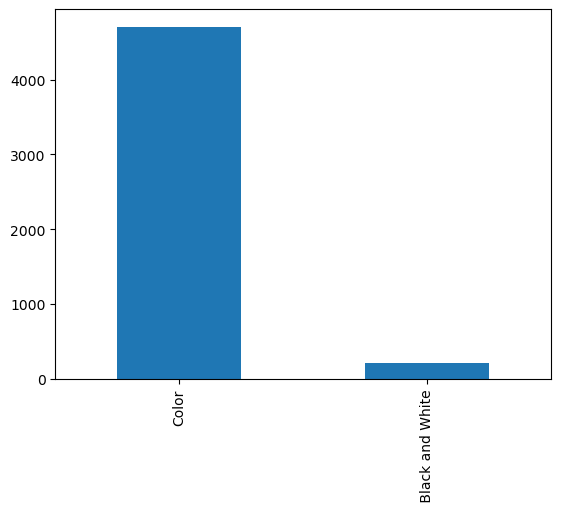

In [64]:
# bar plot shows the numbers of difference between color movie 

merged_df['color'].value_counts().plot(kind='bar')

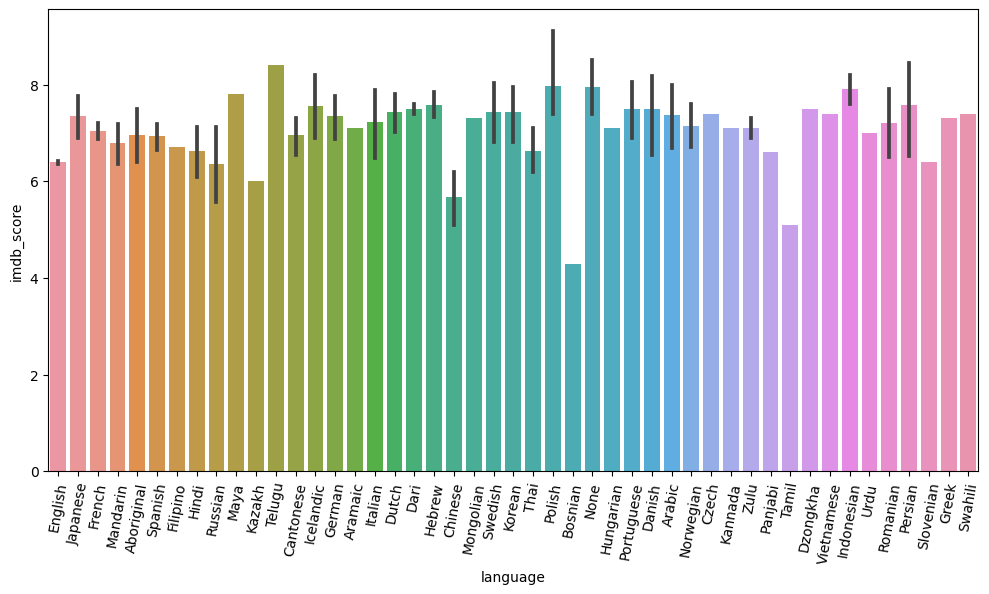

In [65]:
#Barplot that shows the correlation between 'language' and 'imdb_score'

plt.figure(figsize = (12, 6))
plot = sns.barplot(x='language', y='imdb_score', data= merged_df)
plt.setp(plot.get_xticklabels(),rotation=80)
plt.show()

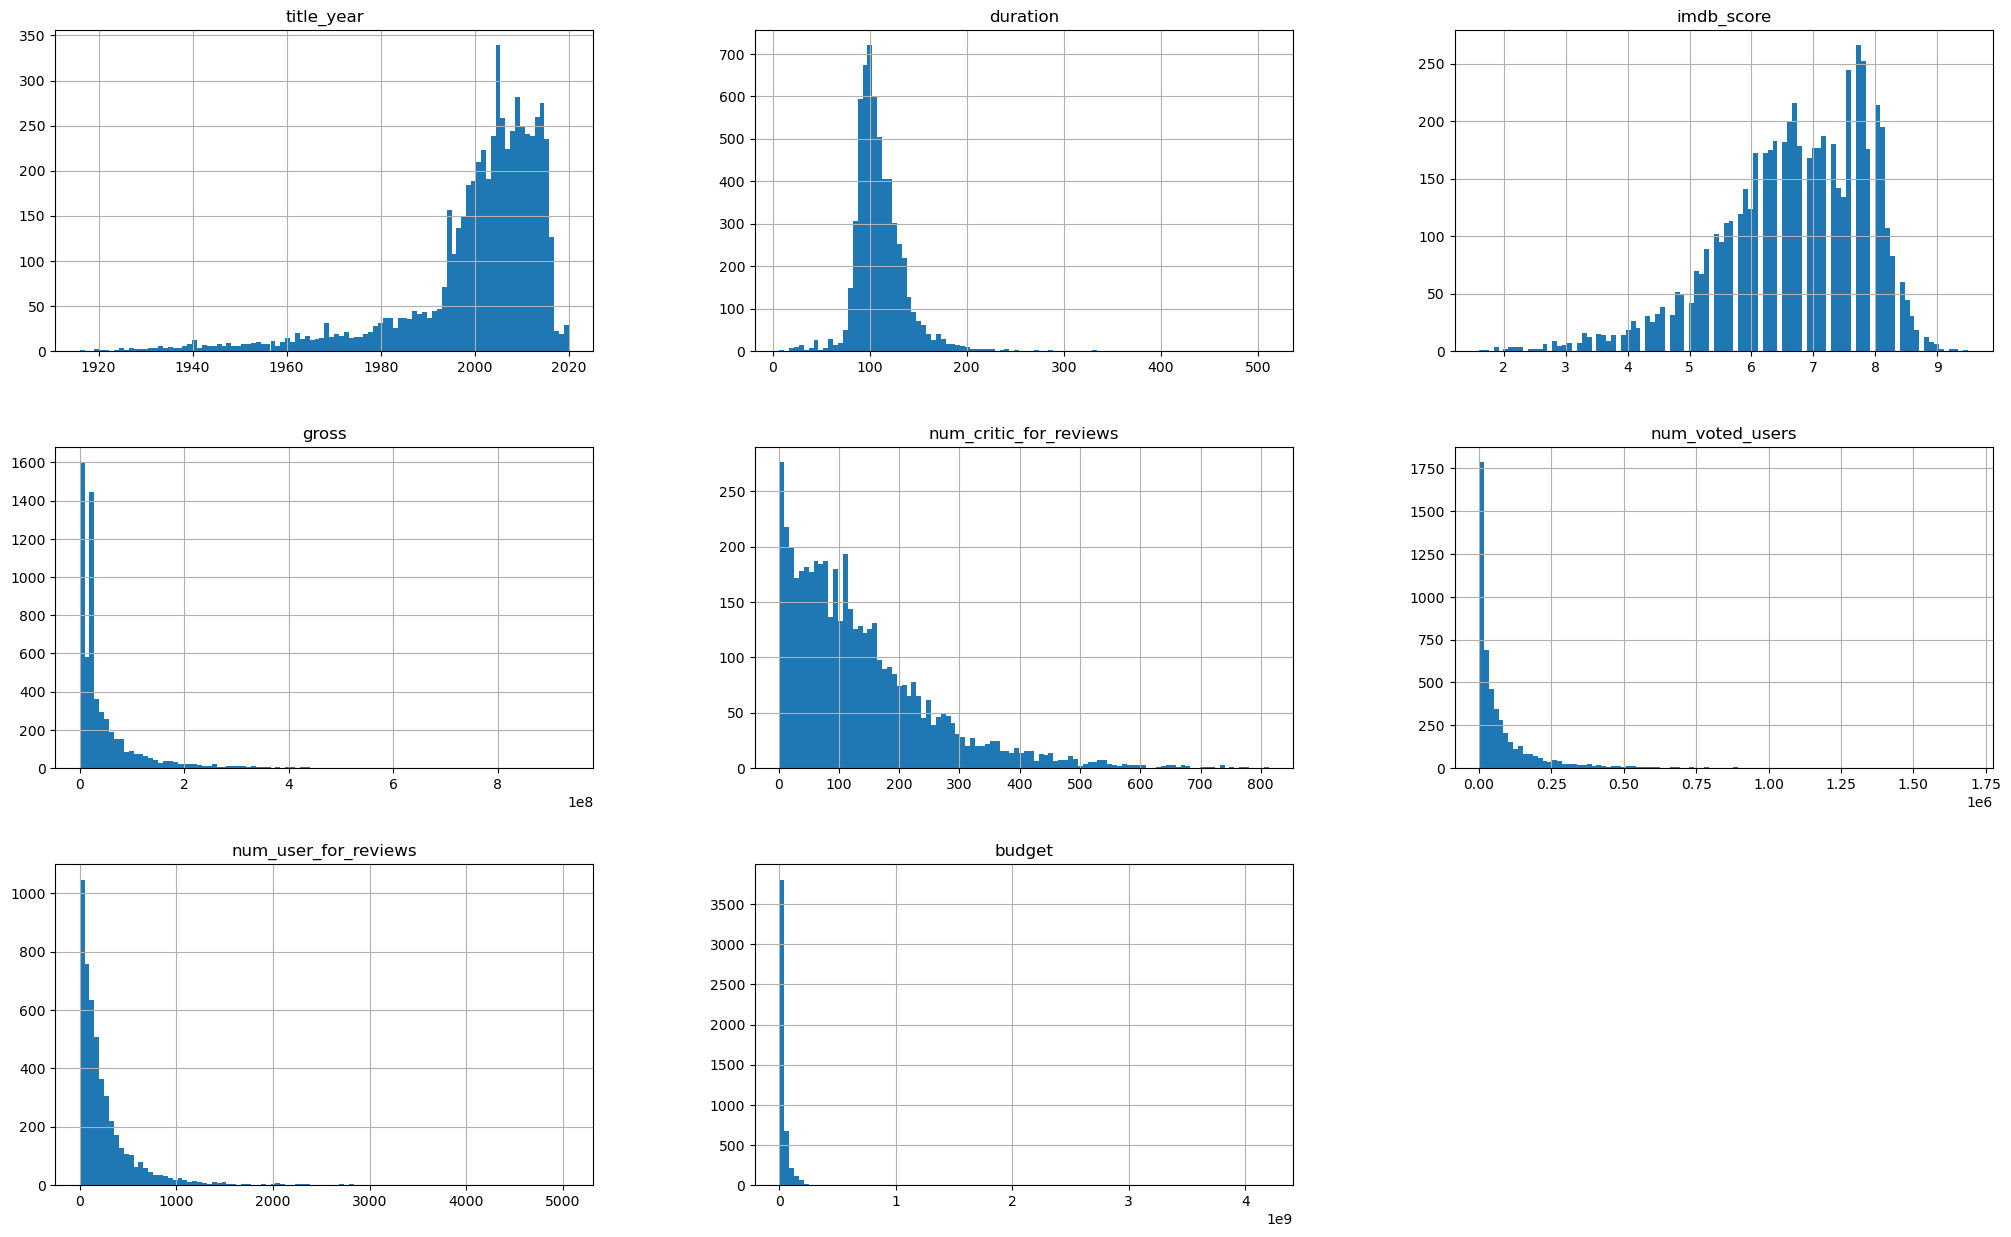

In [66]:
#Histogram for numerical attribute

import matplotlib.pyplot as plt
merged_df.hist(bins=100, figsize=(25,15))
plt.show()

array([[<AxesSubplot:xlabel='imdb_score', ylabel='imdb_score'>,
        <AxesSubplot:xlabel='gross', ylabel='imdb_score'>,
        <AxesSubplot:xlabel='budget', ylabel='imdb_score'>],
       [<AxesSubplot:xlabel='imdb_score', ylabel='gross'>,
        <AxesSubplot:xlabel='gross', ylabel='gross'>,
        <AxesSubplot:xlabel='budget', ylabel='gross'>],
       [<AxesSubplot:xlabel='imdb_score', ylabel='budget'>,
        <AxesSubplot:xlabel='gross', ylabel='budget'>,
        <AxesSubplot:xlabel='budget', ylabel='budget'>]], dtype=object)

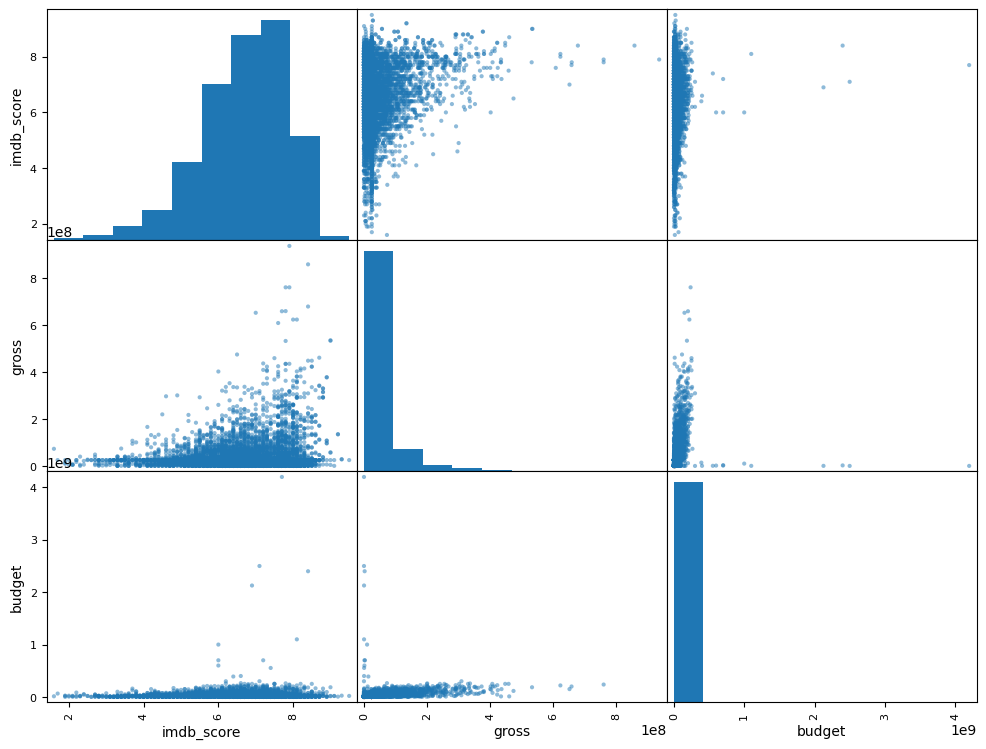

In [67]:
# Scatter matrix show the correlation between imdb_score, gross, and budget

import pandas
from pandas.plotting import scatter_matrix
attributes = ["imdb_score", "gross", "budget"]
scatter_matrix(merged_df[attributes], figsize=(12,9))

<AxesSubplot:xlabel='title_year', ylabel='imdb_score'>

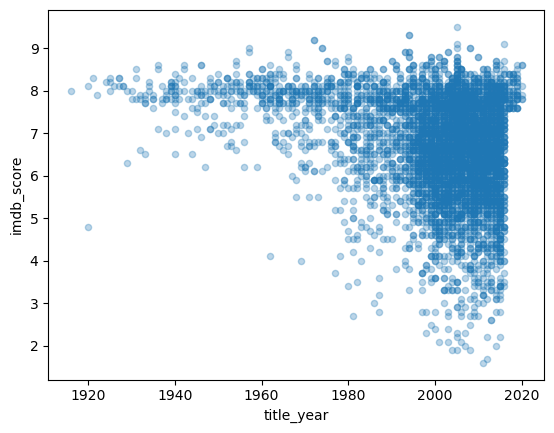

In [68]:
#Scatterplot of the movie year distribution

merged_df.plot(kind = "scatter", x = 'title_year', y = 'imdb_score', alpha=0.3)

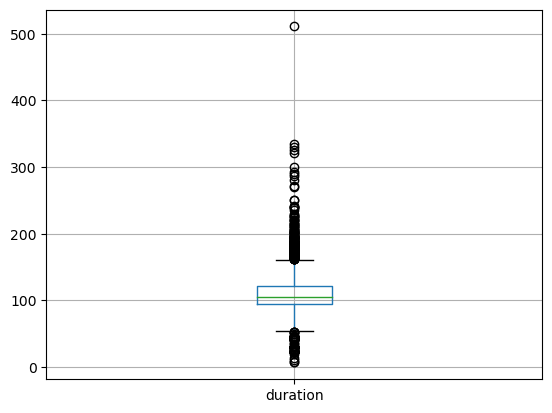

In [69]:
#Boxplot to check the outliner of the duration

Duration_Ol = merged_df.boxplot(column = 'duration')

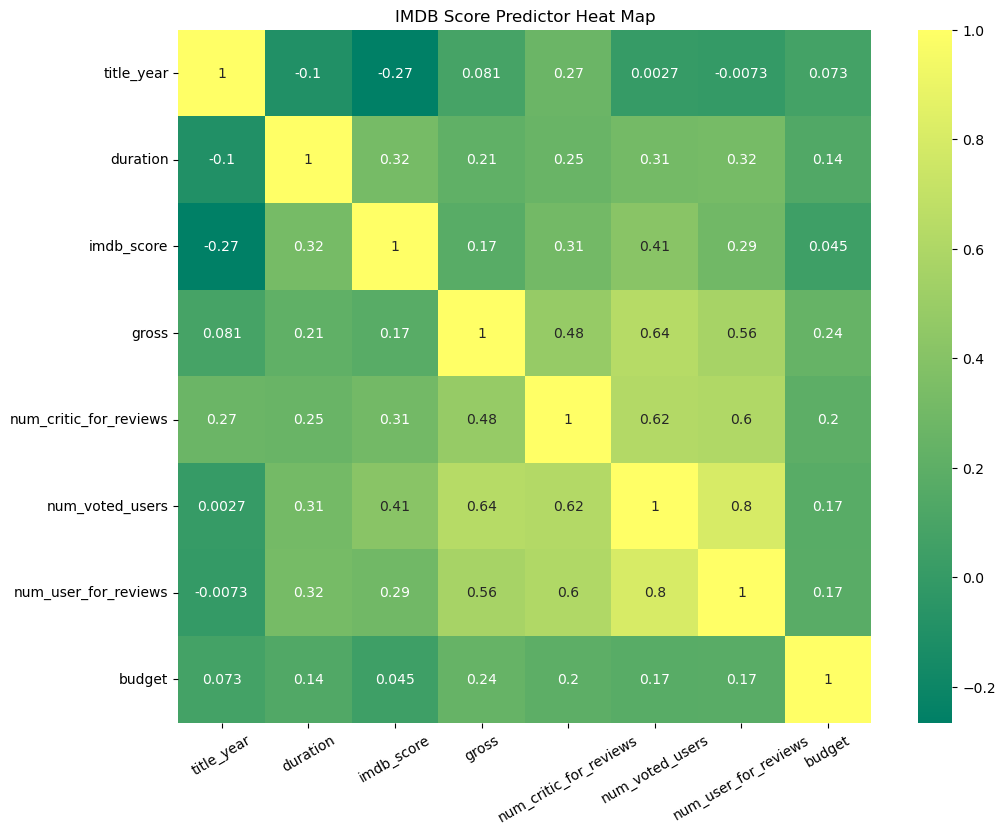

In [70]:
# heat map
plt.figure(figsize=(12,9))
plot = sns.heatmap(merged_df.corr(), annot=True, cmap="summer", square=True)
plt.setp(plot.get_xticklabels(),rotation=30)
plt.title("IMDB Score Predictor Heat Map") 
plt.show()

# the number of the voted users, number of critic for review and duration has high positive correlation between the imdb_score
# the budgt has the lowest of the correlation between the imdb_score, and the title_year has neg. correlation between imdb_score
# title_year has low correlation between number of reviews and users

In [71]:
print(merged_df['content_rating'].value_counts())

R            2511
PG-13        1454
PG            723
U             335
A             197
UA            174
G             124
Not Rated     115
Approved       65
Unrated        60
Passed         43
TV-14          31
TV-MA          19
TV-PG          16
X              12
TV-G           10
GP              8
NC-17           7
M               5
16              1
U/A             1
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64


In [72]:
# Create content_cat feature to keep the top five most frequent rating and make the rest as "other"


content_ratings = merged_df['content_rating'].value_counts()
top_ratings = content_ratings[:5]
other_count = content_ratings[5:].sum()
all_ratings = pd.concat([top_ratings, pd.Series({'Other': other_count})])
ratings_df = pd.DataFrame({'Content Rating': all_ratings.index, 'Count': all_ratings.values})

print(ratings_df)

  Content Rating  Count
0              R   2511
1          PG-13   1454
2             PG    723
3              U    335
4              A    197
5          Other    693


In [73]:
# According to the visualization, the scale of the budget and gross are larger than other numerical attribute
# Rescale the feature of budget and gross with all other feature
# fit scaler on 'budget' and 'gross'
# transform these two columns using scaler

# ask if it's a good idea

scaler = StandardScaler()
numerical_cols = ['budget', 'gross', 'duration', 'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews']
scaler.fit(merged_df[numerical_cols])
merged_df[numerical_cols] = scaler.transform(merged_df[numerical_cols])
print(merged_df[numerical_cols].describe())

             budget         gross      duration  num_voted_users  \
count  4.914000e+03  5.913000e+03  5.913000e+03     4.914000e+03   
mean   1.650254e-15  2.136762e-15 -5.861670e-16     8.723181e-17   
std    1.000102e+00  1.000085e+00  1.000085e+00     1.000102e+00   
min   -3.661747e-01 -6.613821e-01 -3.889238e+00    -5.973237e-01   
25%   -2.927378e-01 -5.576883e-01 -5.959234e-01    -5.368908e-01   
50%   -1.579246e-01 -3.052545e-01 -1.795273e-01    -3.577098e-01   
75%    5.347521e-02  8.309420e-02  4.261397e-01     8.108203e-02   
max    4.369730e+01  1.265813e+01  1.518927e+01     1.163777e+01   

       num_user_for_reviews  num_critic_for_reviews  
count          4.914000e+03            4.914000e+03  
mean           2.590746e-16           -5.213801e-16  
std            1.000102e+00            1.000102e+00  
min           -7.157288e-01           -1.142319e+00  
25%           -5.460795e-01           -7.325139e-01  
50%           -3.064162e-01           -2.474379e-01  
75%      

In [74]:
# create director avgerage rating which contains IMDB score and director's name
# groupby fuction to group the director's name and calculate the mean score
# use reset_index() convert result back the dataframe
# add back to the merged_df

director_rating = merged_df.groupby('director_name')['imdb_score'].mean().reset_index()
director_rating = director_rating.rename(columns={'imdb_score': 'dir_avg_rating'})
merged_df = pd.merge(merged_df, director_rating, on='director_name', how='left', suffixes=('_left', '_right'))
print(director_rating)

         director_name  dir_avg_rating
0        A. Raven Cruz             1.9
1           Aamir Khan             8.4
2           Aaron Hann             6.0
3      Aaron Schneider             7.1
4        Aaron Seltzer             2.7
...                ...             ...
2573       Çagan Irmak             8.3
2574  Émile Gaudreault             6.7
2575      Éric Tessier             6.6
2576     Étienne Faure             4.3
2577  Ömer Faruk Sorak             8.0

[2578 rows x 2 columns]


In [75]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 5912
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             5913 non-null   object 
 1   title_year              5913 non-null   Int64  
 2   content_rating          5913 non-null   object 
 3   duration                5913 non-null   float64
 4   genres                  5913 non-null   object 
 5   imdb_score              5913 non-null   float64
 6   director_name           5913 non-null   object 
 7   actor_1_name            5913 non-null   object 
 8   actor_2_name            5913 non-null   object 
 9   actor_3_name            5913 non-null   object 
 10  gross                   5913 non-null   float64
 11  color                   4914 non-null   object 
 12  num_critic_for_reviews  4914 non-null   float64
 13  num_voted_users         4914 non-null   float64
 14  num_user_for_reviews    4914 non-null   

In [76]:
# after then we can drop the director_name feature and also do the same thing for the actor
# merged actor 1, 2, 3 and get the avg_rating

actor_1_rating = merged_df.groupby('actor_1_name')['imdb_score'].mean().reset_index()
actor_1_rating = actor_1_rating.rename(columns={'imdb_score': 'act_1_avg_rating'})
merged_df = pd.merge(merged_df, actor_1_rating, on='actor_1_name', how='left', suffixes=('_left', '_right'))
print(actor_1_rating)

               actor_1_name  act_1_avg_rating
0                   50 Cent          5.000000
1              A.J. Buckley          6.800000
2                   Aaliyah          5.200000
3                Aamir Khan          8.214286
4      Aaron Taylor-Johnson          7.600000
...                     ...               ...
2590         Çetin Tekindor          8.300000
2591          Éric Toledano          8.500000
2592  Ólafur Darri Ólafsson          8.200000
2593          Óscar Jaenada          6.800000
2594       Ömer Faruk Sorak          8.000000

[2595 rows x 2 columns]


In [77]:
actor_2_rating = merged_df.groupby('actor_2_name')['imdb_score'].mean().reset_index()
actor_2_rating = actor_2_rating.rename(columns={'imdb_score': 'act_2_avg_rating'})
merged_df = pd.merge(merged_df, actor_2_rating, on='actor_2_name', how='left', suffixes=('_left', '_right'))
print(actor_2_rating)

            actor_2_name  act_2_avg_rating
0                50 Cent          6.266667
1     A. Michael Baldwin          6.500000
2           A.J. Buckley          6.200000
3            AJ Michalka          6.900000
4          Aaron Ashmore          5.350000
...                  ...               ...
3660     Zooey Deschanel          6.575000
3661         Zoë Kravitz          6.000000
3662       Zubaida Sahar          7.400000
3663      Çetin Tekindor          8.400000
3664         Özge Özberk          8.000000

[3665 rows x 2 columns]


In [78]:
actor_3_rating = merged_df.groupby('actor_3_name')['imdb_score'].mean().reset_index()
actor_3_rating = actor_3_rating.rename(columns={'imdb_score': 'act_3_avg_rating'})
merged_df = pd.merge(merged_df, actor_3_rating, on='actor_3_name', how='left', suffixes=('_left', '_right'))
print(actor_3_rating)

         actor_3_name  act_3_avg_rating
0             50 Cent          6.000000
1        A.J. Buckley          5.733333
2        A.J. DeLucia          4.500000
3         A.J. Langer          3.900000
4             Aaliyah          6.100000
...               ...               ...
4252      Zoë Kravitz          6.950000
4253   Zoë Poledouris          6.100000
4254    Ángela Molina          7.300000
4255  Émilie Dequenne          6.000000
4256    Óscar Jaenada          5.650000

[4257 rows x 2 columns]


In [79]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 5912
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             5913 non-null   object 
 1   title_year              5913 non-null   Int64  
 2   content_rating          5913 non-null   object 
 3   duration                5913 non-null   float64
 4   genres                  5913 non-null   object 
 5   imdb_score              5913 non-null   float64
 6   director_name           5913 non-null   object 
 7   actor_1_name            5913 non-null   object 
 8   actor_2_name            5913 non-null   object 
 9   actor_3_name            5913 non-null   object 
 10  gross                   5913 non-null   float64
 11  color                   4914 non-null   object 
 12  num_critic_for_reviews  4914 non-null   float64
 13  num_voted_users         4914 non-null   float64
 14  num_user_for_reviews    4914 non-null   

In [80]:
# merged all avg actor rating, and merged to get the mean of the avg actor 

merged_df['act_avg_rating'] = merged_df[['act_1_avg_rating', 'act_2_avg_rating', 'act_3_avg_rating']].mean(axis=1)

In [81]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 5912
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             5913 non-null   object 
 1   title_year              5913 non-null   Int64  
 2   content_rating          5913 non-null   object 
 3   duration                5913 non-null   float64
 4   genres                  5913 non-null   object 
 5   imdb_score              5913 non-null   float64
 6   director_name           5913 non-null   object 
 7   actor_1_name            5913 non-null   object 
 8   actor_2_name            5913 non-null   object 
 9   actor_3_name            5913 non-null   object 
 10  gross                   5913 non-null   float64
 11  color                   4914 non-null   object 
 12  num_critic_for_reviews  4914 non-null   float64
 13  num_voted_users         4914 non-null   float64
 14  num_user_for_reviews    4914 non-null   

In [82]:
# after creating the numerical data for the object type attribute director and actor drop all the object type feature

merged_df.drop(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'act_1_avg_rating', 'act_2_avg_rating', 'act_3_avg_rating'],axis=1, inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 5912
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             5913 non-null   object 
 1   title_year              5913 non-null   Int64  
 2   content_rating          5913 non-null   object 
 3   duration                5913 non-null   float64
 4   genres                  5913 non-null   object 
 5   imdb_score              5913 non-null   float64
 6   gross                   5913 non-null   float64
 7   color                   4914 non-null   object 
 8   num_critic_for_reviews  4914 non-null   float64
 9   num_voted_users         4914 non-null   float64
 10  num_user_for_reviews    4914 non-null   float64
 11  language                4914 non-null   object 
 12  country                 4914 non-null   object 
 13  budget                  4914 non-null   float64
 14  dir_avg_rating          5913 non-null   

In [87]:
#identify the missing value in features then use MICE imputation

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



missing_features = ["num_critic_for_reviews", "num_voted_users","num_user_for_reviews", "budget"]
impute_merged_df = merged_df[missing_features + ["imdb_score"]]
imputer = IterativeImputer(max_iter=50, random_state=0)
imputed_merged_df = imputer.fit_transform(impute_merged_df)
merged_df[missing_features] = imputed_merged_df[:, :-1]

In [88]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 5912
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             5913 non-null   object 
 1   title_year              5913 non-null   Int64  
 2   content_rating          5913 non-null   object 
 3   duration                5913 non-null   float64
 4   genres                  5913 non-null   object 
 5   imdb_score              5913 non-null   float64
 6   gross                   5913 non-null   float64
 7   color                   4914 non-null   object 
 8   num_critic_for_reviews  5913 non-null   float64
 9   num_voted_users         5913 non-null   float64
 10  num_user_for_reviews    5913 non-null   float64
 11  language                4914 non-null   object 
 12  country                 4914 non-null   object 
 13  budget                  5913 non-null   float64
 14  dir_avg_rating          5913 non-null   